In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import rand_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
%matplotlib inline


In [94]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [95]:
X_ = data.drop(['ocean_proximity','total_bedrooms'], axis=1)
y = data['ocean_proximity']

In [104]:
X = (X_ - X_.mean(axis = 0))/X_.std(axis = 0)

In [97]:
N, d = X.shape
N,d

(20640, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,
    stratify=y, random_state=42
)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

In [100]:
pred_labeles = dtc.predict(X_test)
rand_s = rand_score(y_test, pred_labeles)
print('Оценка RAND: ', rand_s)

Оценка RAND:  0.9739240222926443


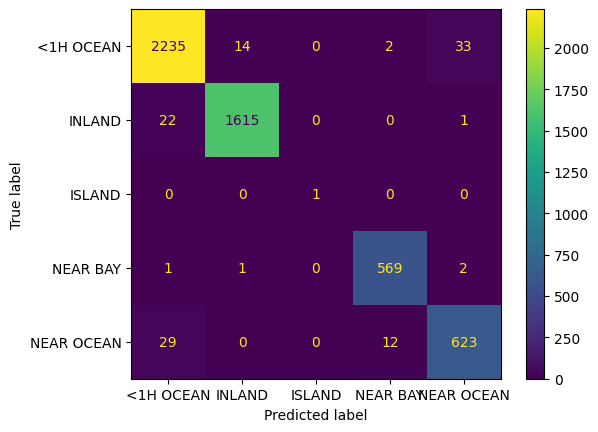

In [101]:
predictions = dtc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()

In [102]:
print(classification_report(y_test, pred_labeles))

              precision    recall  f1-score   support

   <1H OCEAN       0.98      0.98      0.98      2284
      INLAND       0.99      0.99      0.99      1638
      ISLAND       1.00      1.00      1.00         1
    NEAR BAY       0.98      0.99      0.98       573
  NEAR OCEAN       0.95      0.94      0.94       664

    accuracy                           0.98      5160
   macro avg       0.98      0.98      0.98      5160
weighted avg       0.98      0.98      0.98      5160



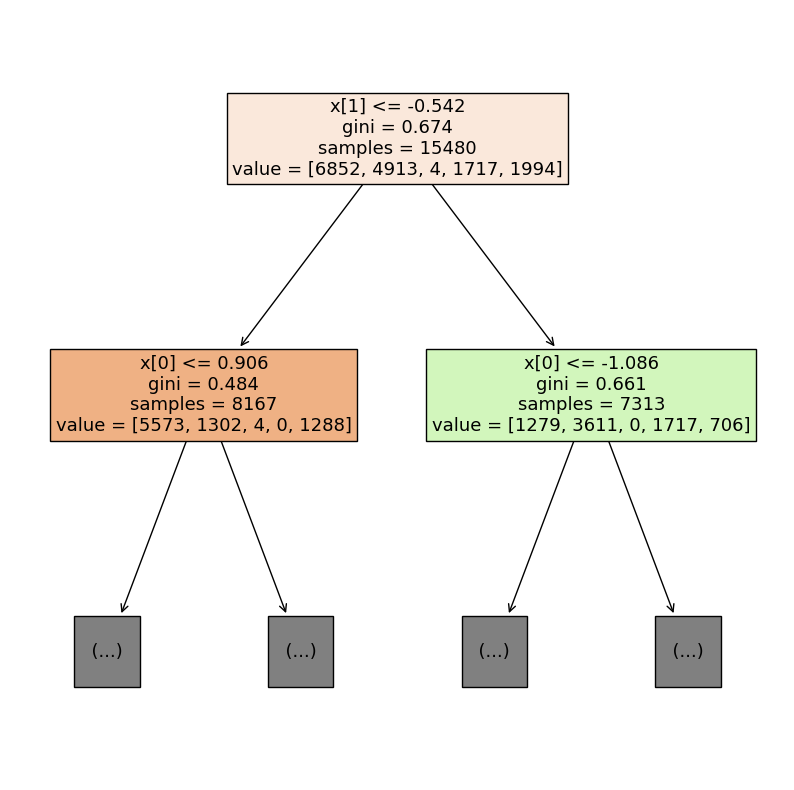

In [116]:
plt.figure(figsize=[10, 10])
plot_tree(dtc, max_depth=1,fontsize=13,filled=True)
pass

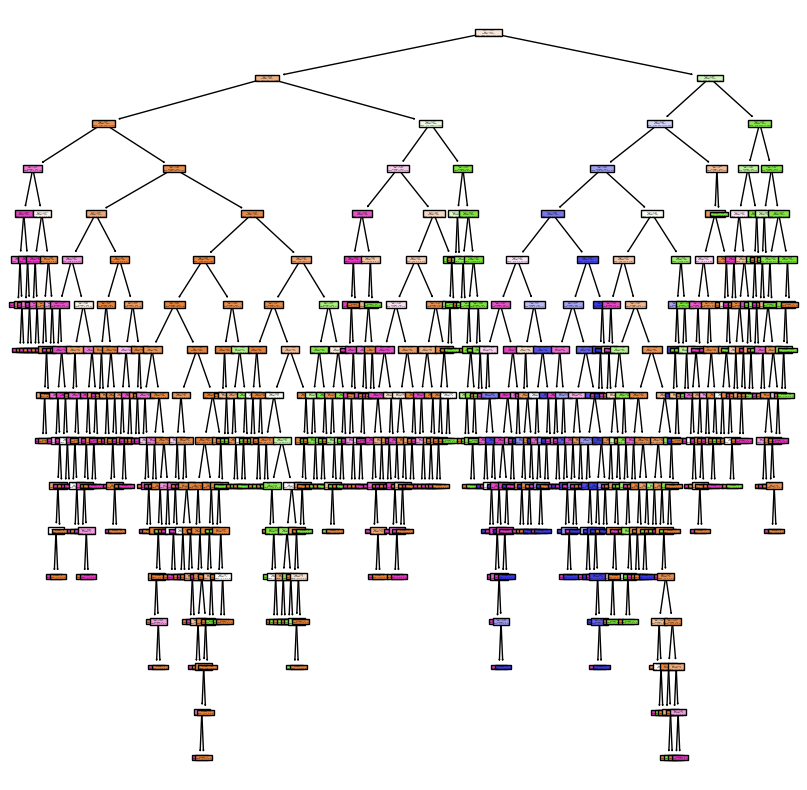

In [114]:
plt.figure(figsize=[10, 10])
plot_tree(dtc,filled=True)
pass